<a href="https://colab.research.google.com/github/Aakash-1s/SDC-GENAI/blob/main/Housing_price_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0, Cost: 99306439928.85042
Iteration 100, Cost: 11242052644.683392
Iteration 200, Cost: 11241290951.356356
Iteration 300, Cost: 11240529318.41876
Iteration 400, Cost: 11239767745.786995
Iteration 500, Cost: 11239006233.456272
Iteration 600, Cost: 11238244781.421814
Iteration 700, Cost: 11237483389.67884
Iteration 800, Cost: 11236722058.22256
Iteration 900, Cost: 11235960787.048208

Final weights (theta):
[  8.77357086 369.74275143  25.98616536]


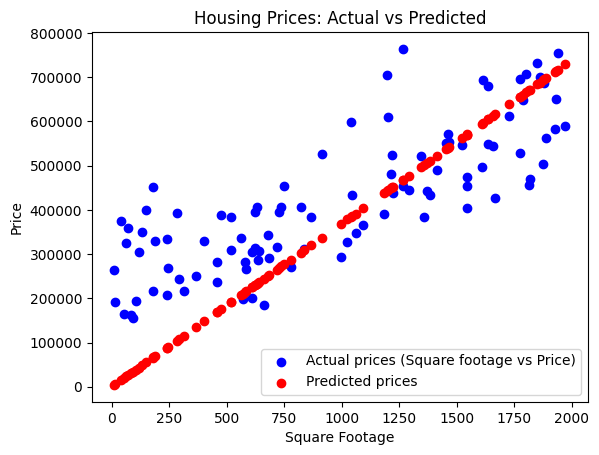

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a synthetic dataset for housing prices
np.random.seed(42)

# Example features: [Square footage, Number of rooms]
X = np.random.rand(100, 2) * np.array([2000, 5])  # 100 houses, square footage (0-2000), rooms (0-5)
y = 100000 + X[:, 0] * 200 + X[:, 1] * 50000 + np.random.randn(100) * 50000  # Price = base + (sqft * 200) + (rooms * 50000) + noise

# Add a bias term (1) to the input features for the intercept in the linear model
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize parameters for linear regression (weights)
theta = np.random.randn(X_bias.shape[1])  # Random initialization of weights

# Hyperparameters
learning_rate = 0.0000001
iterations = 1000

# Linear Regression Training using Gradient Descent
def linear_regression(X, y, theta, learning_rate, iterations):
    m = len(y)  # Number of training examples

    for i in range(iterations):
        predictions = X.dot(theta)
        error = predictions - y

        # Compute the gradient
        gradient = (1/m) * X.T.dot(error)

        # Update weights
        theta -= learning_rate * gradient

        # Print the cost every 100 iterations
        if i % 100 == 0:
            cost = (1/(2*m)) * np.sum(np.square(error))
            print(f"Iteration {i}, Cost: {cost}")

    return theta

# Train the model
theta = linear_regression(X_bias, y, theta, learning_rate, iterations)

# Print the final model parameters (weights)
print("\nFinal weights (theta):")
print(theta)

# Make predictions using the trained model
predictions = X_bias.dot(theta)

# Plot the results
plt.scatter(X[:, 0], y, color='blue', label='Actual prices (Square footage vs Price)')
plt.scatter(X[:, 0], predictions, color='red', label='Predicted prices')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.title('Housing Prices: Actual vs Predicted')
plt.show()

